# Website Security Assessment Tool

This notebook demonstrates how to use the Website Security Assessment Tool to perform legitimate, non-invasive security assessments of websites. The tool analyzes various aspects of a website including:

1. Initial reconnaissance
2. HTTP header analysis
3. Content analysis
4. SSL/TLS assessment
5. Technology stack detection
6. Public directory analysis

**Important Note:** This tool is for educational and authorized testing purposes only. Always ensure you have proper permission before conducting security assessments on any website.

## Setup

First, let's install the required dependencies:

In [15]:
!pip install requests beautifulsoup4 pandas matplotlib

## Upload the Script

You need to upload the `website_security_assessment.py` file to this Colab environment. Use the file upload button in the left sidebar, or run the following cell to show the upload widget:

In [16]:
from google.colab import files
uploaded = files.upload()

# Verify the file was uploaded
!ls -la

Saving website_security_assessment.py to website_security_assessment (1).py
total 132
drwxr-xr-x 1 root root  4096 Mar  8 23:04  .
drwxr-xr-x 1 root root  4096 Mar  8 22:48  ..
-rw-r--r-- 1 root root 22362 Mar  8 22:51  assessment_results.json
drwxr-xr-x 4 root root  4096 Mar  6 14:29  .config
drwxr-xr-x 2 root root  4096 Mar  8 22:51  __pycache__
drwxr-xr-x 1 root root  4096 Mar  6 14:29  sample_data
-rw-r--r-- 1 root root 41472 Mar  8 23:04 'website_security_assessment (1).py'
-rw-r--r-- 1 root root 41472 Mar  8 22:51  website_security_assessment.py


## Import and Use the Assessment Tool

Now let's import the necessary functions from the script and run an assessment:

In [23]:
from website_security_assessment import WebsiteSecurityAssessment, run_assessment

# Verify the import worked
print("Successfully imported the WebsiteSecurityAssessment class and run_assessment function.")

Successfully imported the WebsiteSecurityAssessment class and run_assessment function.


## Enter Target URL

Enter the URL of the website you want to assess. Remember to only assess websites you have permission to test.

In [24]:
import ipywidgets as widgets

url_input = widgets.Text(
    value='https://github.com/',
    placeholder='Enter website URL',
    description='Target URL:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(url_input)

Text(value='https://github.com/', description='Target URL:', placeholder='Enter website URL', style=Descriptio…

## Run the Assessment

Now let's run the security assessment on the target website. This will take a few minutes to complete.

Starting security assessment of https://github.com/

[+] Performing initial reconnaissance...
Server IP: 140.82.113.3
robots.txt found
Found 55 disallowed paths
No sitemap.xml found
.well-known/security.txt found

[+] Analyzing HTTP headers...
Collected 17 HTTP headers
Missing security headers: Permissions-Policy
Information disclosure in headers: {"Server": "GitHub.com"}

[+] Analyzing page content...
Found 47 meta tags
Found 5 forms
Found 124 links

[+] Assessing SSL/TLS configuration...
SSL certificate expires in 334 days
SSL/TLS Protocol: TLSv1.3, Cipher: TLS_AES_128_GCM_SHA256

[+] Detecting technology stack...
CMS: WordPress
JavaScript Libraries: React, D3.js
Analytics: 
Third-party Services: Cloudflare, AWS, Stripe

[+] Analyzing directories and files...
Found 14 accessible paths
Found 7 potentially sensitive directories/files

[+] Generating summary...
Found 5 issues: 1 High, 3 Medium, 1 Low
Overall risk level: Low (15.9/100)
Assessment complete!
SECURITY ASSESSMENT REPORT: htt

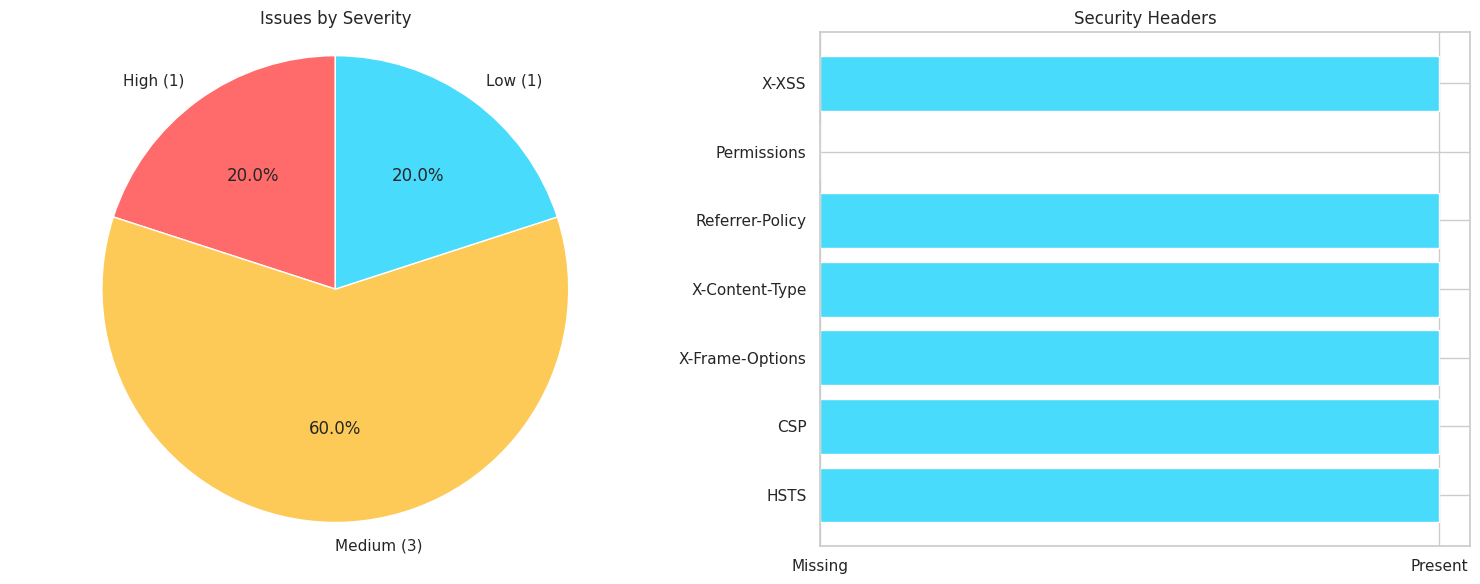

In [25]:
# Get the URL from the input widget
target_url = url_input.value

# Run the assessment
results = run_assessment(target_url)

## Visualize Results

Let's create some additional visualizations to better understand the results:

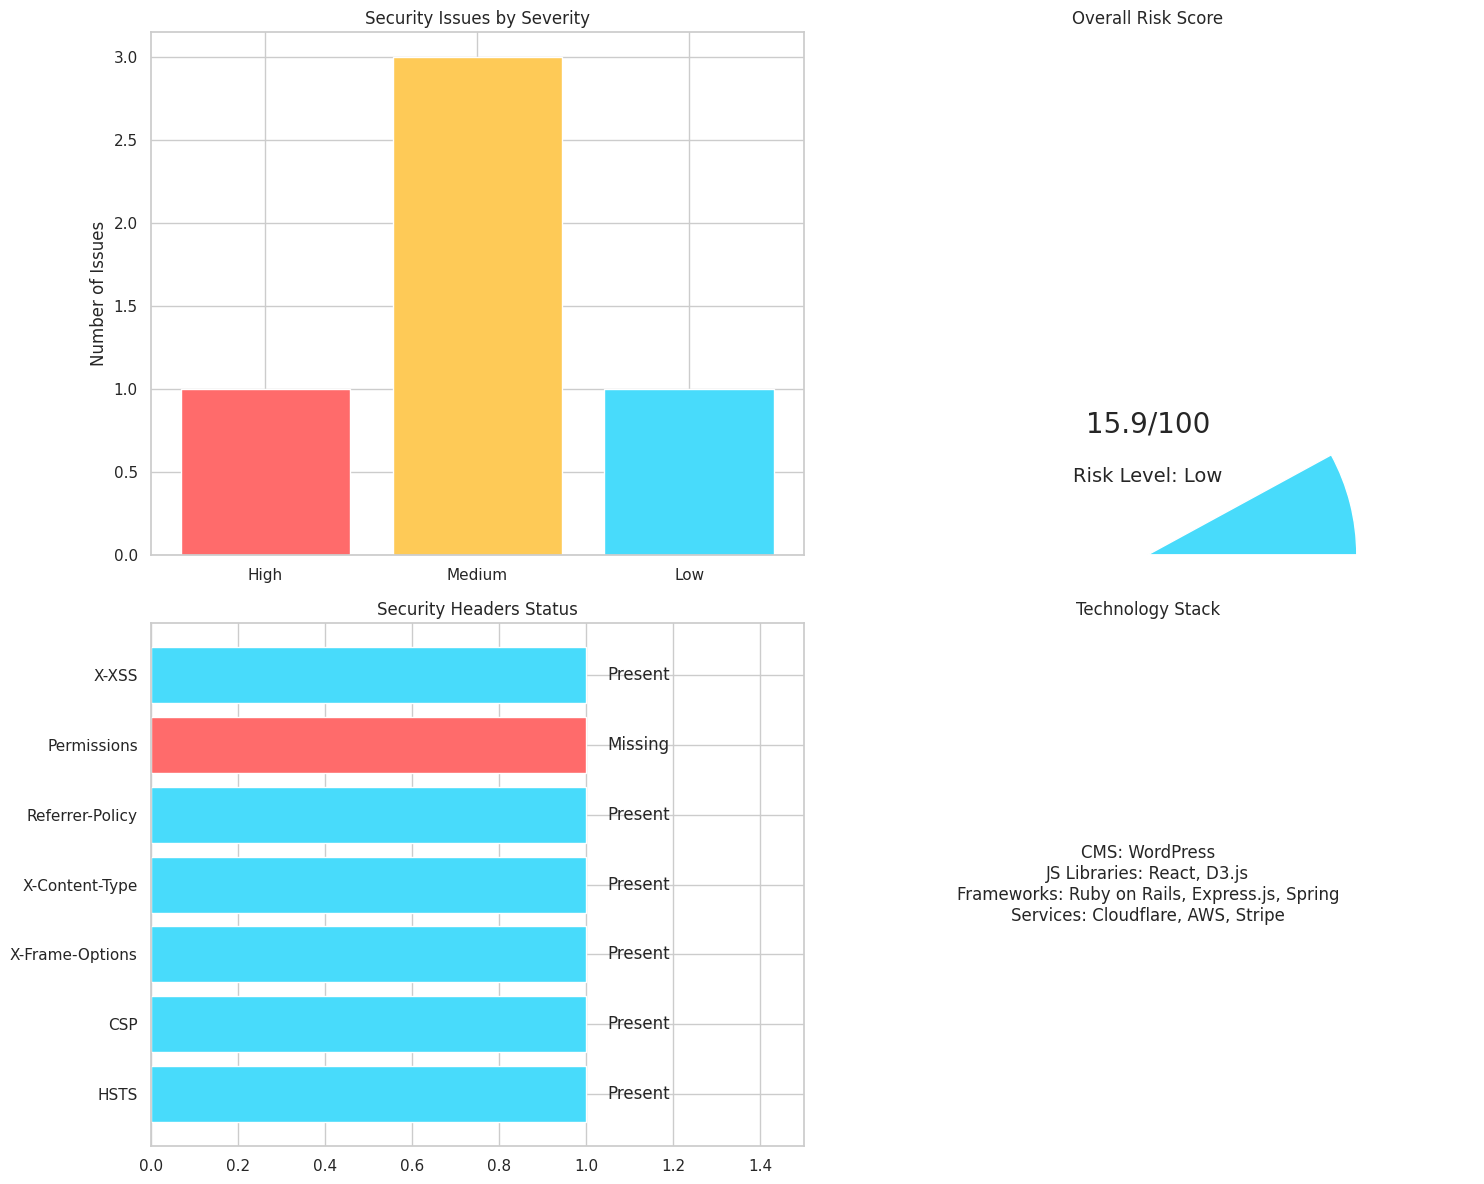

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Security Issues by Severity
severity_counts = results['summary']['severity_counts']
severities = ['High', 'Medium', 'Low']
counts = [severity_counts['High'], severity_counts['Medium'], severity_counts['Low']]
colors = ['#ff6b6b', '#feca57', '#48dbfb']

axes[0, 0].bar(severities, counts, color=colors)
axes[0, 0].set_title('Security Issues by Severity')
axes[0, 0].set_ylabel('Number of Issues')

# 2. Risk Score Gauge
from matplotlib.patches import Wedge

risk_score = results['summary']['risk_score']
risk_level = results['summary']['risk_level']

# Create a gauge chart
axes[0, 1].set_aspect('equal')
axes[0, 1].set_title('Overall Risk Score')

# Background gauge (gray)
Wedge(center=(0.5, 0), r=0.4, theta1=0, theta2=180,
      transform=axes[0, 1].transAxes, facecolor='#e0e0e0')

# Foreground gauge (colored based on risk)
if risk_level == 'Critical':
    color = '#ff0000'
elif risk_level == 'High':
    color = '#ff6b6b'
elif risk_level == 'Medium':
    color = '#feca57'
else:
    color = '#48dbfb'

gauge_value = min(180, max(0, risk_score * 1.8))  # Scale to 0-180 degrees
wedge = Wedge(center=(0.5, 0), r=0.4, theta1=0, theta2=gauge_value,
              transform=axes[0, 1].transAxes, facecolor=color)
axes[0, 1].add_patch(wedge)

# Add text
axes[0, 1].text(0.5, 0.25, f"{risk_score:.1f}/100", ha='center', va='center',
                transform=axes[0, 1].transAxes, fontsize=20)
axes[0, 1].text(0.5, 0.15, f"Risk Level: {risk_level}", ha='center', va='center',
                transform=axes[0, 1].transAxes, fontsize=14)
axes[0, 1].axis('off')

# 3. Security Headers Status
headers = results.get("headers", {}).get("security_headers", {})
header_names = list(headers.keys())
header_status = ["Present" if headers[h]["present"] else "Missing" for h in header_names]

# Shorten header names for display
short_names = [h.replace("Content-Security-Policy", "CSP")
              .replace("Strict-Transport-Security", "HSTS")
              .replace("X-Content-Type-Options", "X-Content-Type")
              .replace("Permissions-Policy", "Permissions")
              .replace("X-XSS-Protection", "X-XSS") for h in header_names]

# Create DataFrame for better visualization
header_df = pd.DataFrame({
    'Header': short_names,
    'Status': header_status
})

# Plot
colors = ['#48dbfb' if status == "Present" else '#ff6b6b' for status in header_status]
axes[1, 0].barh(header_df['Header'], [1] * len(header_df), color=colors)
axes[1, 0].set_title('Security Headers Status')
axes[1, 0].set_xlim(0, 1.5)

# Add text labels
for i, status in enumerate(header_status):
    axes[1, 0].text(1.05, i, status, va='center')

# 4. Technology Stack
tech_stack = results.get("tech_stack", {})
tech_info = []

if tech_stack.get("cms") and tech_stack.get("cms") != "Unknown":
    tech_info.append(f"CMS: {tech_stack['cms']}")

if tech_stack.get("javascript_libraries"):
    tech_info.append(f"JS Libraries: {', '.join(tech_stack['javascript_libraries'][:3])}")
    if len(tech_stack['javascript_libraries']) > 3:
        tech_info[-1] += f" +{len(tech_stack['javascript_libraries'])-3} more"

if tech_stack.get("frameworks"):
    tech_info.append(f"Frameworks: {', '.join(tech_stack['frameworks'][:3])}")
    if len(tech_stack['frameworks']) > 3:
        tech_info[-1] += f" +{len(tech_stack['frameworks'])-3} more"

if tech_stack.get("analytics"):
    tech_info.append(f"Analytics: {', '.join(tech_stack['analytics'][:3])}")
    if len(tech_stack['analytics']) > 3:
        tech_info[-1] += f" +{len(tech_stack['analytics'])-3} more"

if tech_stack.get("third_party_services"):
    tech_info.append(f"Services: {', '.join(tech_stack['third_party_services'][:3])}")
    if len(tech_stack['third_party_services']) > 3:
        tech_info[-1] += f" +{len(tech_stack['third_party_services'])-3} more"

# Create a text box with technology information
axes[1, 1].axis('off')
axes[1, 1].set_title('Technology Stack')
tech_text = '\n'.join(tech_info) if tech_info else "No technology information detected"
axes[1, 1].text(0.5, 0.5, tech_text, ha='center', va='center',
                transform=axes[1, 1].transAxes, fontsize=12)

plt.tight_layout()
plt.show()

## Export Results

You can export the assessment results as a JSON file for further analysis:

In [27]:
import json

# Export results to JSON file
with open('assessment_results.json', 'w') as f:
    json.dump(results, f, indent=2)

# Download the file
from google.colab import files
files.download('assessment_results.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Security Issues Table

Let's create a table of all the security issues found:

In [28]:
# Create a DataFrame of issues
issues = results['summary']['issues']
if issues:
    # Sort issues by severity (High -> Medium -> Low)
    severity_order = {"High": 0, "Medium": 1, "Low": 2}
    sorted_issues = sorted(issues, key=lambda x: severity_order[x["severity"]])

    # Create DataFrame
    issues_df = pd.DataFrame(sorted_issues)

    # Apply styling
    def highlight_severity(val):
        if val == 'High':
            return 'background-color: #ff6b6b; color: white'
        elif val == 'Medium':
            return 'background-color: #feca57; color: black'
        else:
            return 'background-color: #48dbfb; color: black'

    # Display styled table
    styled_df = issues_df.style.applymap(highlight_severity, subset=['severity'])
    display(styled_df)
else:
    print("No security issues found.")

<ipython-input-28-0df786ddba26>:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = issues_df.style.applymap(highlight_severity, subset=['severity'])


,title,severity,description,recommendation
0,Sensitive Directories Exposed,High,7 potentially sensitive directories/files are accessible,Restrict access to sensitive directories and files
1,Information Disclosure,Medium,robots.txt reveals 55 restricted paths,Consider reviewing robots.txt to ensure it doesn't reveal sensitive directories
2,Missing Security Headers,Medium,Missing 1 security headers: Permissions-Policy,Implement the missing security headers to improve website security
3,Potential Outdated Libraries,Medium,Website uses JavaScript libraries that may be outdated,Regularly update all JavaScript libraries to their latest versions
4,Information Disclosure,Low,"Server information disclosed in headers: {""Server"": ""GitHub.com""}",Remove or obfuscate headers that reveal server technologies


## Conclusion

This notebook has demonstrated how to use the Website Security Assessment Tool to perform a legitimate, non-invasive security assessment of a website. The tool provides valuable insights into potential security issues and areas for improvement.

Remember that this tool is for educational and authorized testing purposes only. Always ensure you have proper permission before conducting security assessments on any website.